In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("shopping_behavior_updated.csv")

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
df.shape

(3900, 18)

In [12]:
## Check for missing values 

df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

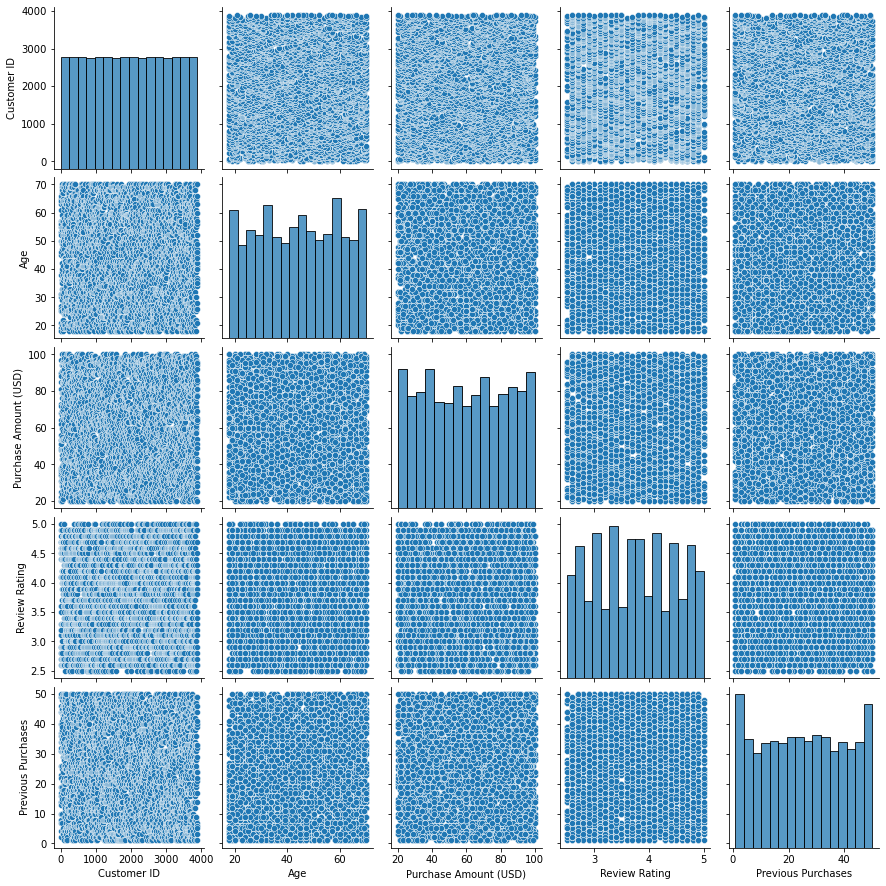

In [13]:
#Quick Oversight with seaborn

sns.pairplot(df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

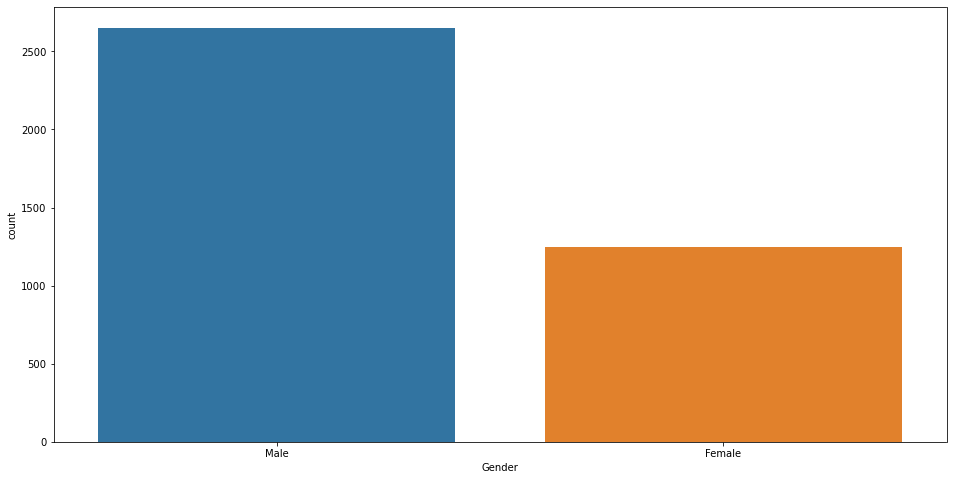

In [23]:
#Customer Gender

plt.figure(figsize=(16,8))
sns.countplot(x= 'Gender',data=df)

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


Text(0, 0.5, 'Amount')

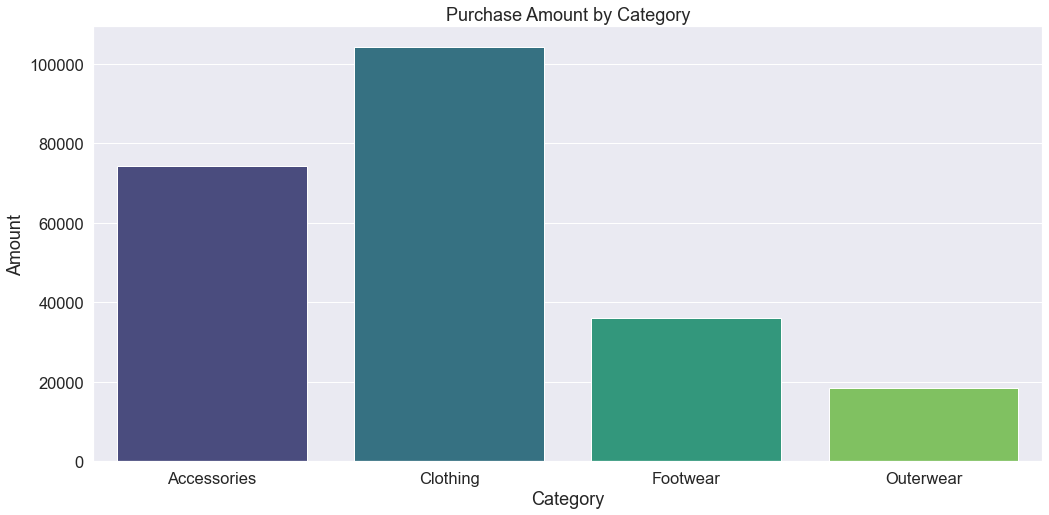

In [212]:
#TOP 50 

plt.figure(figsize=(17,8))
sns.set(font_scale=1.5)


category_amount_purchase = df.groupby('Category')["Purchase Amount (USD)"].sum()

print(category_amount_purchase)
sns.barplot(x=category_amount_purchase.index, y= category_amount_purchase.values, palette='viridis')
plt.title('Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Amount')

In [52]:
df['Subscription Status'].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

In [55]:
df['Promo Code Used'].value_counts()

No     2223
Yes    1677
Name: Promo Code Used, dtype: int64

In [60]:
df['Size'].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

Size
L      61667
M     105167
S      40468
XL     25779
Name: Purchase Amount (USD), dtype: int64


<AxesSubplot:xlabel='Size'>

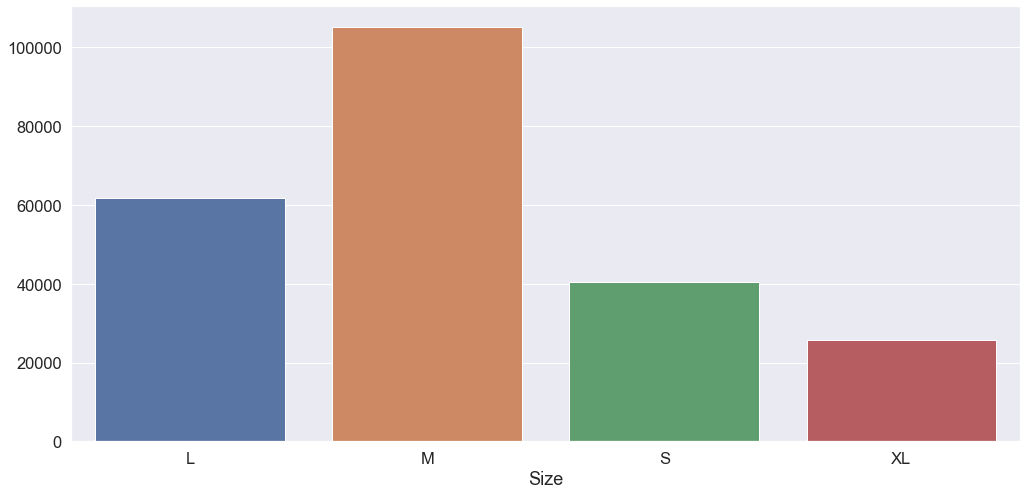

In [70]:
#SALES BY AMOUNT


plt.figure(figsize=(17,8))

print(size_purchase_amount)
size_purchase_amount = df.groupby('Size')["Purchase Amount (USD)"].sum()

sns.barplot(x=size_purchase_amount.index,y=size_purchase_amount.values,data=df)


In [71]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [73]:
df['Location'].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nebraska          87
Nevada            87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
New Mexico        81
West Virginia     81
Mississippi       80
Georgia           79
Arkansas          79
Indiana           79
Kentucky          79
Connecticut       78
North Carolina    78
Ohio              77
Texas             77
Virginia          77
Maine             77
Tennessee         77
South Carolina    76
Wisconsin         75
Colorado          75
Oklahoma          75
Pennsylvania      74
Oregon            74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Wyoming           71
New Hampshire     71
Utah              71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

In [101]:
Top_location_purchase = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(15)

In [102]:
#TOP 15 states by Purchase Amount

Top_location_purchase

Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
New Mexico       5014
Minnesota        4977
Pennsylvania     4926
Mississippi      4883
Alaska           4867
Name: Purchase Amount (USD), dtype: int64

In [322]:
least_location_purchase = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).tail()

Location
Rhode Island    3871
New Jersey      3802
Florida         3798
Hawaii          3752
Kansas          3437
Name: Purchase Amount (USD), dtype: int64


<AxesSubplot:xlabel='Location'>

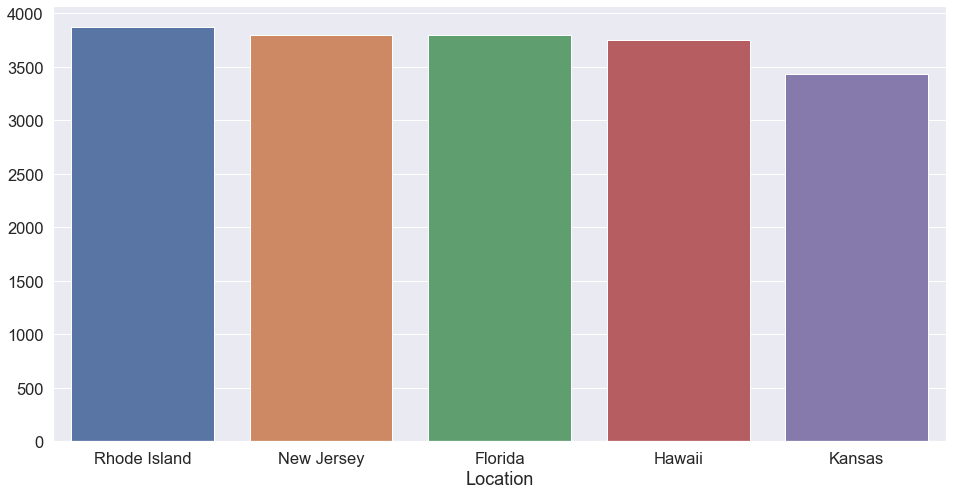

In [331]:
plt.figure(figsize=(16,8))
print(least_location_purchase)
sns.barplot(x=least_location_purchase.index,y=least_location_purchase.values,data=df)


Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: Purchase Amount (USD), dtype: int64


<AxesSubplot:xlabel='Season'>

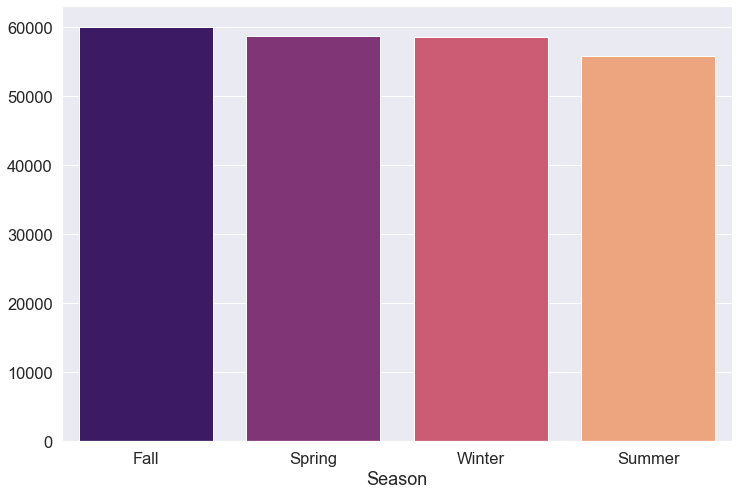

In [333]:
#Purchase Amount by Season

plt.figure(figsize=(12,8))

print(season_purchase)

season_purchase = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

sns.barplot(x=season_purchase.index,y=season_purchase.values,data=df,palette='magma')

In [131]:
#Season, category by purchase amount

df.groupby(['Season','Category'])['Purchase Amount (USD)'].sum()

Season  Category   
Fall    Accessories    19874
        Clothing       26220
        Footwear        8665
        Outerwear       5259
Spring  Accessories    17007
        Clothing       27692
        Footwear        9555
        Outerwear       4425
Summer  Accessories    19028
        Clothing       23078
        Footwear        9393
        Outerwear       4278
Winter  Accessories    18291
        Clothing       27274
        Footwear        8480
        Outerwear       4562
Name: Purchase Amount (USD), dtype: int64

In [133]:
seasons_cat = df.groupby(['Season','Category'])['Purchase Amount (USD)'].sum()

Text(0.5, 1.0, 'Seasons by Category')

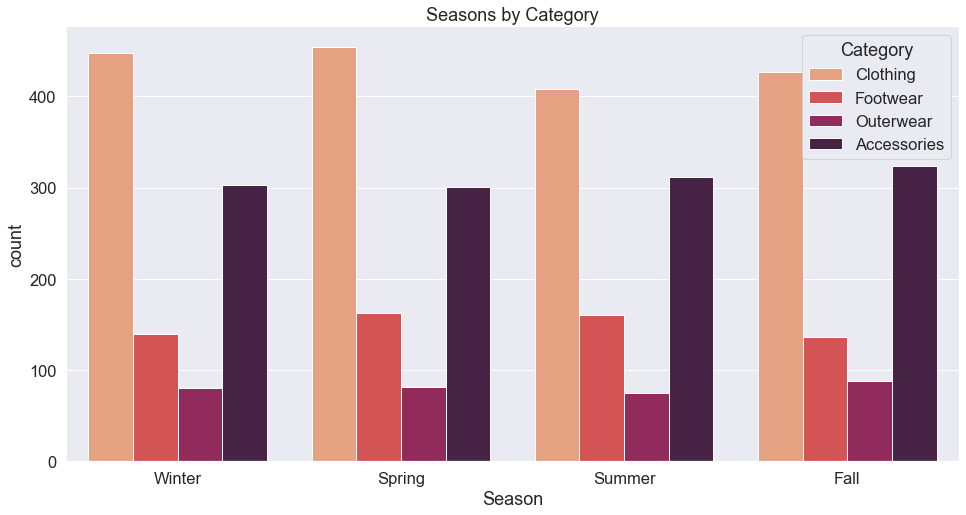

In [137]:
plt.figure(figsize=(16,8))
sns.countplot(x='Season',hue='Category',data=df,palette="rocket_r")
plt.title('Seasons by Category')

In [123]:
#MOST USED PAYMENT METHOD 

df['Payment Method'].value_counts().head(1)

PayPal    677
Name: Payment Method, dtype: int64

In [312]:
df['Payment Method'].value_counts().tail(1)

Bank Transfer    612
Name: Payment Method, dtype: int64

In [132]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [313]:
df.groupby('Color')['Purchase Amount (USD)'].count().sort_values(ascending = False)

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Violet       166
Cyan         166
Gray         159
Maroon       158
Orange       154
Pink         153
Charcoal     153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Lavender     147
Indigo       147
Beige        147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Purchase Amount (USD), dtype: int64

Text(0.5, 0, 'Colors')

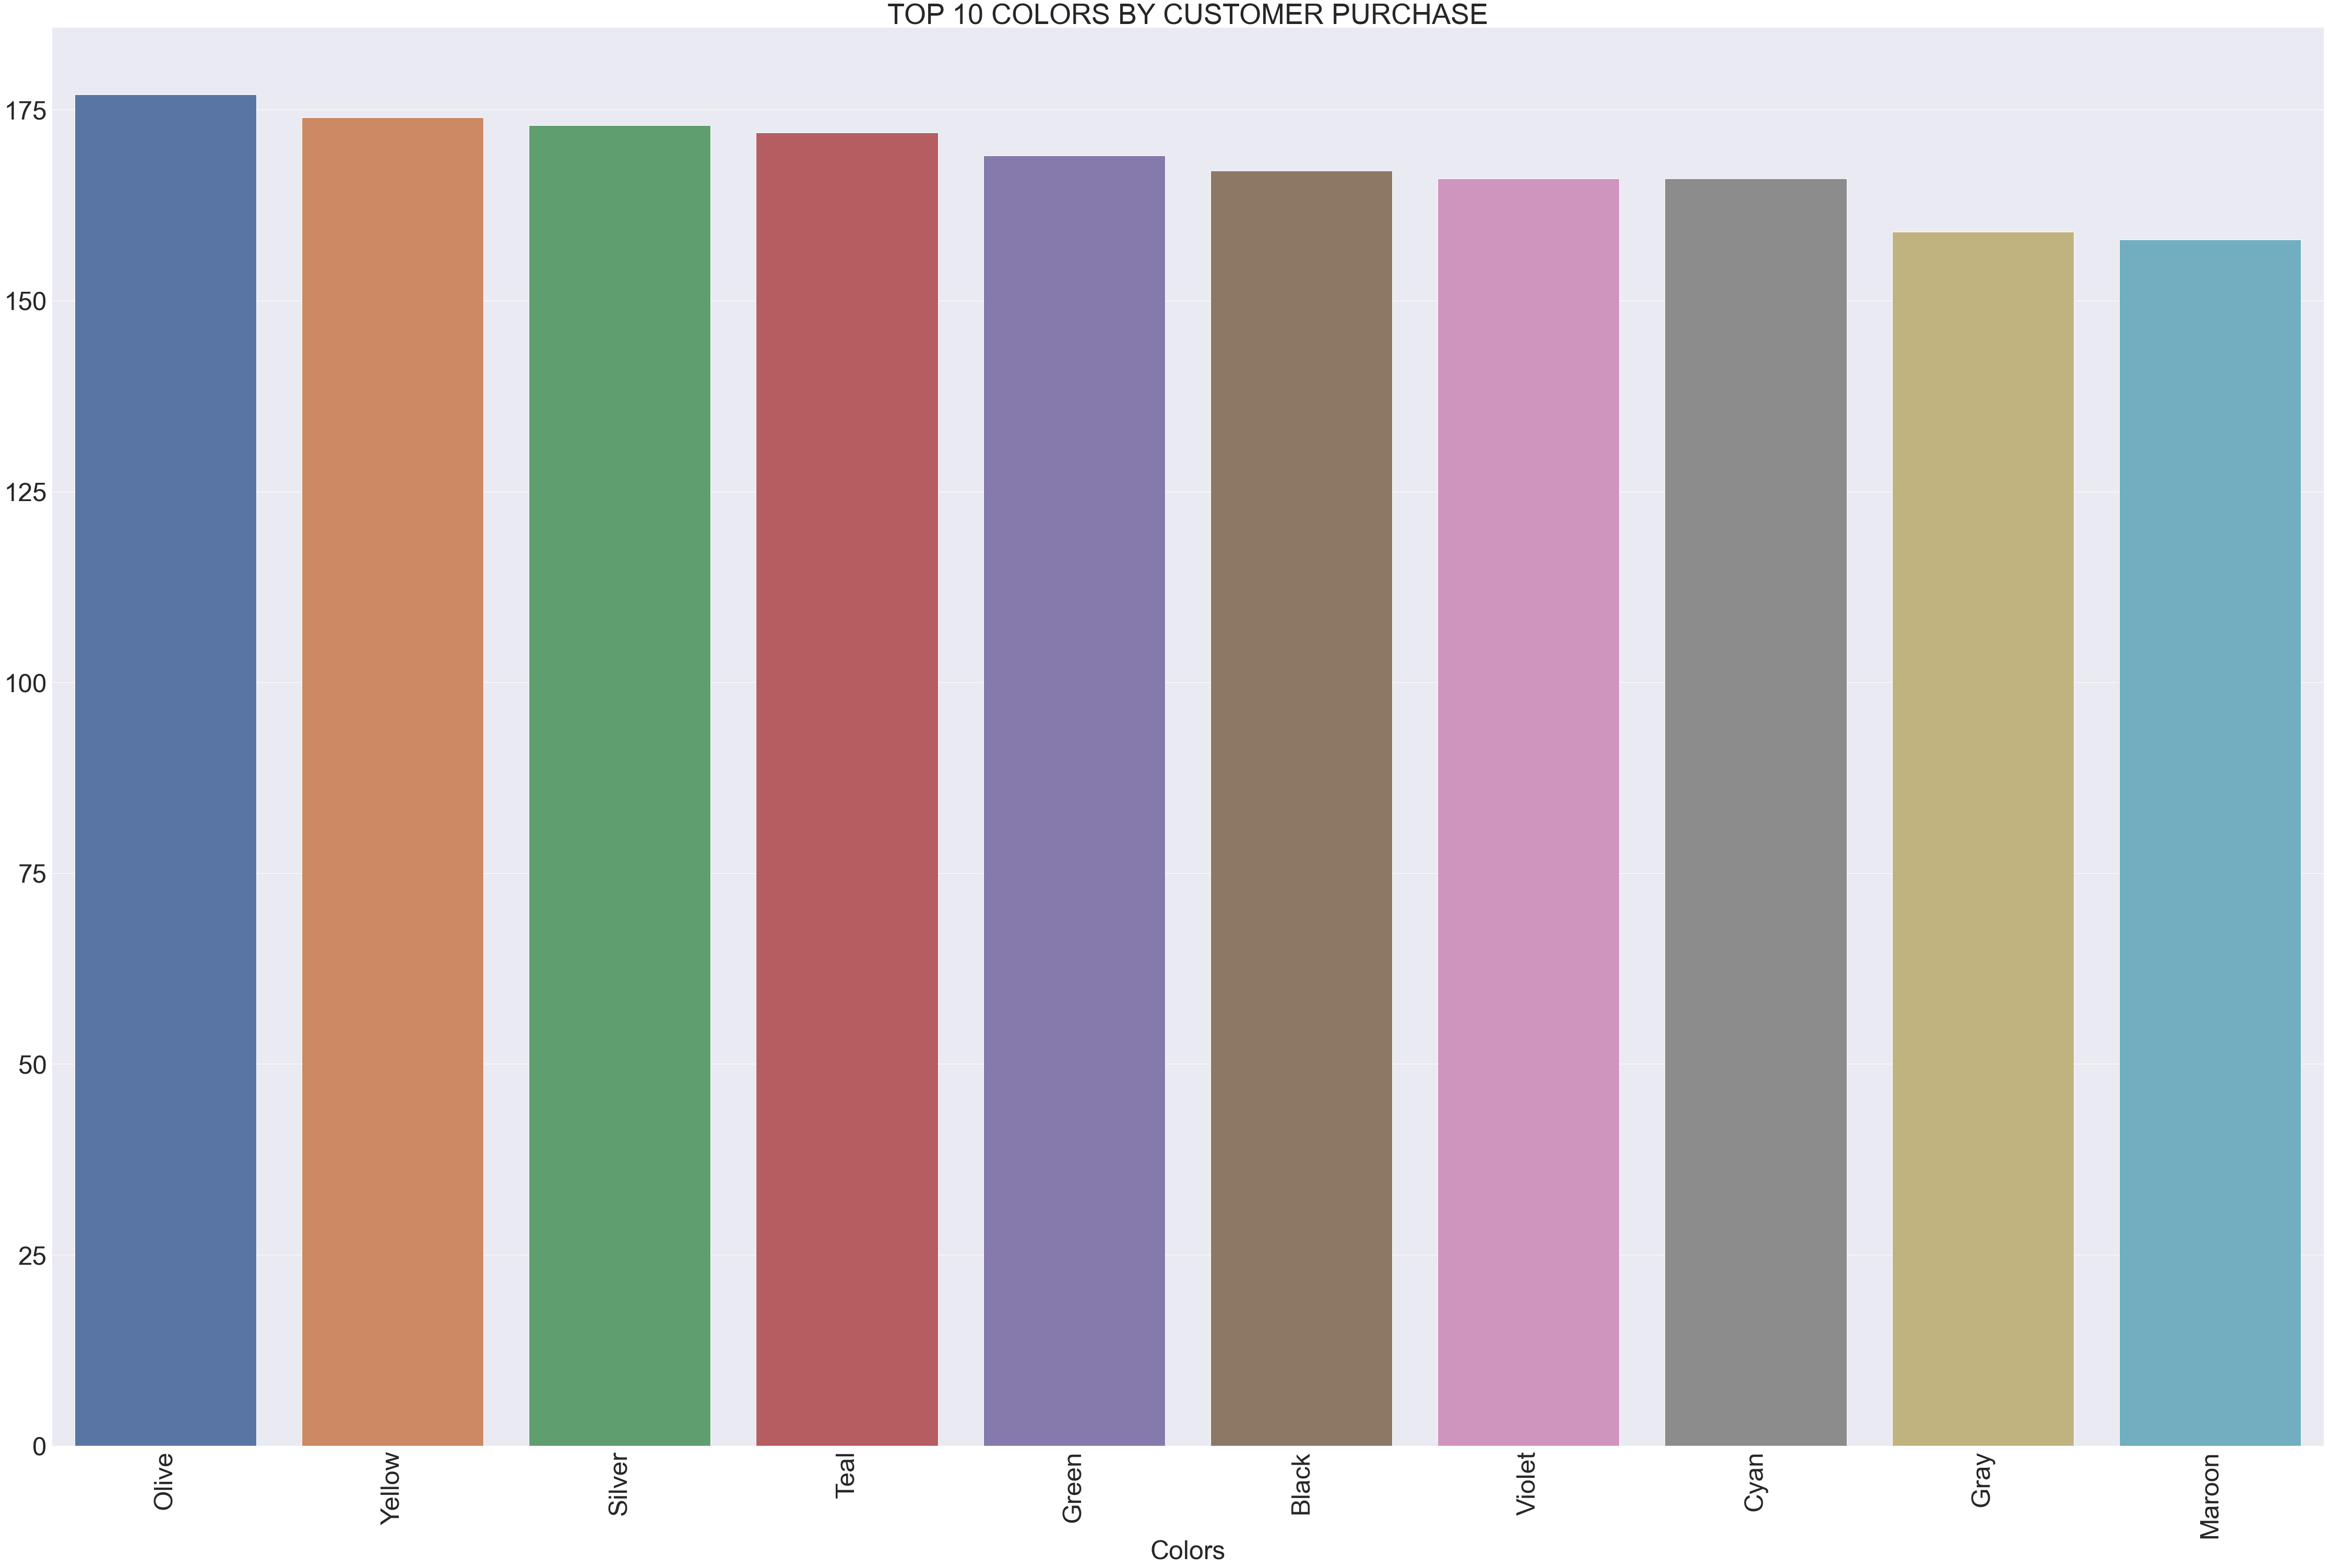

In [314]:
plt.figure(figsize=(78,50))
plt.tight_layout()
sns.set(font_scale=4.5)
items_purchase_color = df.groupby('Color')['Purchase Amount (USD)'].count().sort_values(ascending = False).head(10)

sns.barplot(x=items_purchase_color.index,y=items_purchase_color.values,data=df)
plt.xticks(rotation=90)

plt.title('TOP 10 COLORS BY CUSTOMER PURCHASE')
plt.xlabel('Colors', fontsize=50)


In [173]:
#GENDER BY LOCATION

df.groupby(['Location', 'Gender']).size().unstack()

Gender,Female,Male
Location,,
Alabama,27,62
Alaska,24,48
Arizona,25,40
Arkansas,25,54
California,29,66
Colorado,26,49
Connecticut,27,51
Delaware,25,61
Florida,20,48


In [175]:
#MOST USED SHIPPING TYPE

df['Shipping Type'].value_counts()

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

In [178]:
df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum().sort_values

Frequency of Purchases
Annually          34419
Bi-Weekly         33200
Every 3 Months    35088
Fortnightly       32007
Monthly           32810
Quarterly         33771
Weekly            31786
Name: Purchase Amount (USD), dtype: int64

Text(0.5, 0, 'Frequency')

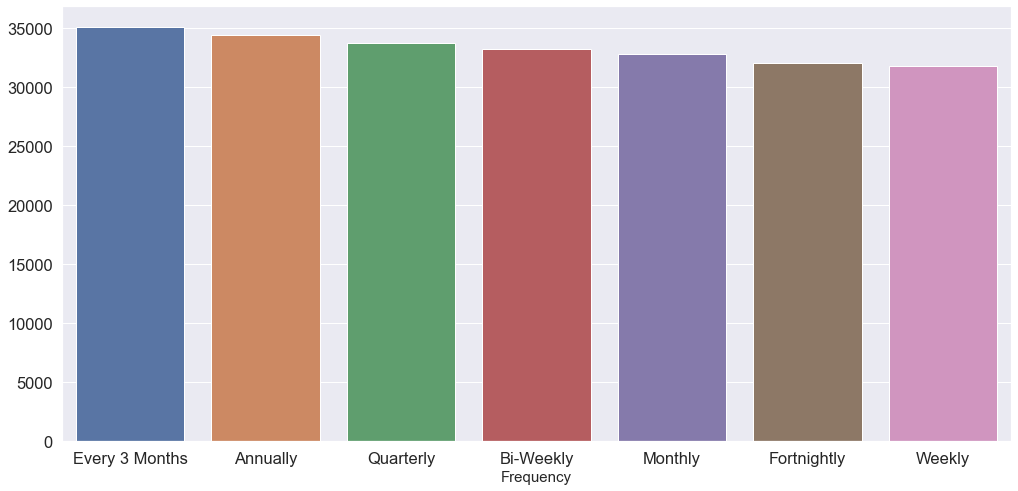

In [225]:
## Frequency of Purchases Highest ranking


plt.figure(figsize=(17,8))
frequency =df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum().sort_values(ascending =False)
sns.barplot(x=frequency.index,y=frequency.values,data=df)
sns.set(font_scale=1.5)
plt.xlabel('Frequency',fontsize=15)


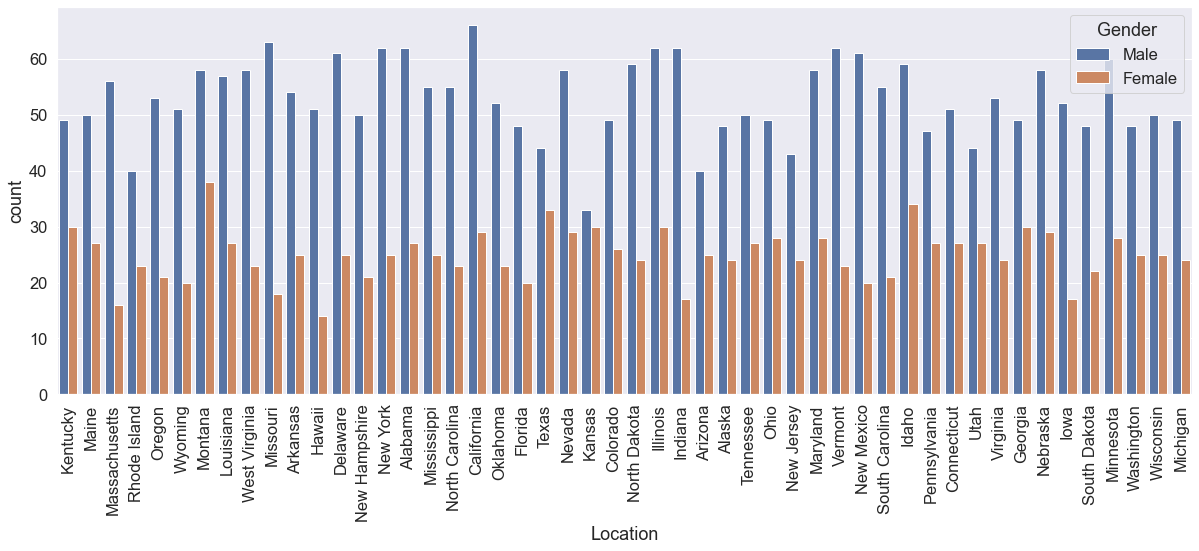

In [227]:
#Gender that did more shopping  by location


plt.figure(figsize=(17,8))
sns.countplot(x='Location',hue='Gender',data=df)
plt.xticks(rotation=90)
plt.tight_layout()

In [230]:
gen_dist = df['Gender'].value_counts()

Text(0.5, 1.0, 'Gender Distribution')

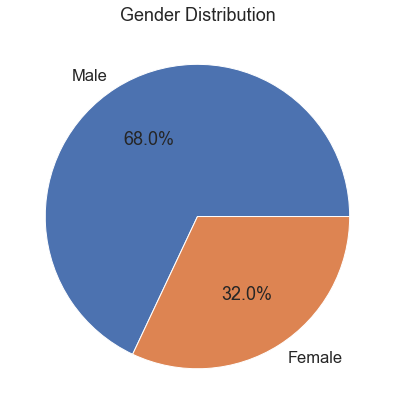

In [236]:
##Gender Distribution 

plt.figure(figsize=(17,7))

plt.pie(gen_dist, labels=gen_dist.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

In [245]:
#which category used the most promo code for purchase

df[df['Promo Code Used'] == 'Yes']['Category'].mode()

0    Clothing
dtype: object

In [266]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [273]:
male_purchases = df[df['Gender']=='Male']

Pants      123
Jewelry    119
Dress      114
Sweater    114
Coat       114
Scarf      112
Shirt      110
Skirt      109
Jacket     109
Shorts     109
Name: Item Purchased, dtype: int64


<AxesSubplot:>

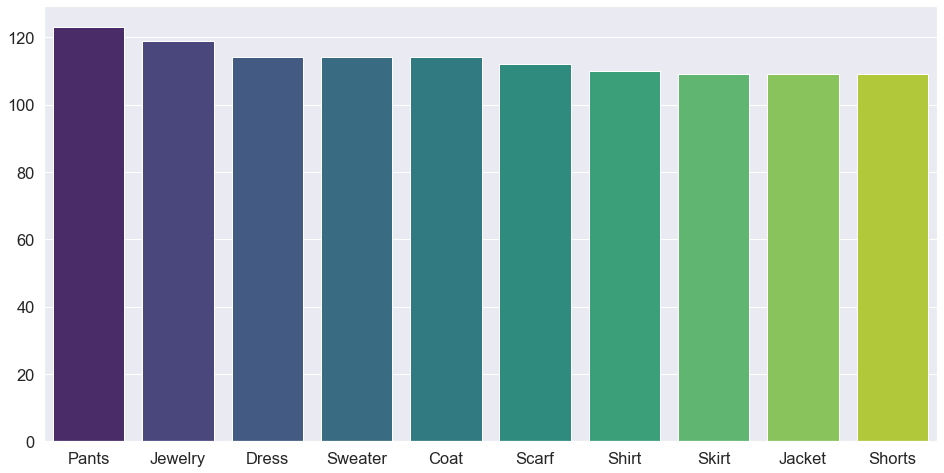

In [304]:
#TOP 10 COLOURS MOSTLY PREFERRED BY MEN.

plt.figure(figsize=(16,8))

print(male_purchases['Item Purchased'].value_counts().head(10).sort_values(ascending=False))

male_purchases_item = male_purchases['Item Purchased'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(x =male_purchases_item.index, y=male_purchases_item.values, data= df, palette= 'viridis')


Age_Range
0-18      69
19-25    502
26-35    742
36-45    729
46-55    753
56-65    750
66+      355
Name: Purchase Amount (USD), dtype: int64


<AxesSubplot:xlabel='Age_Range'>

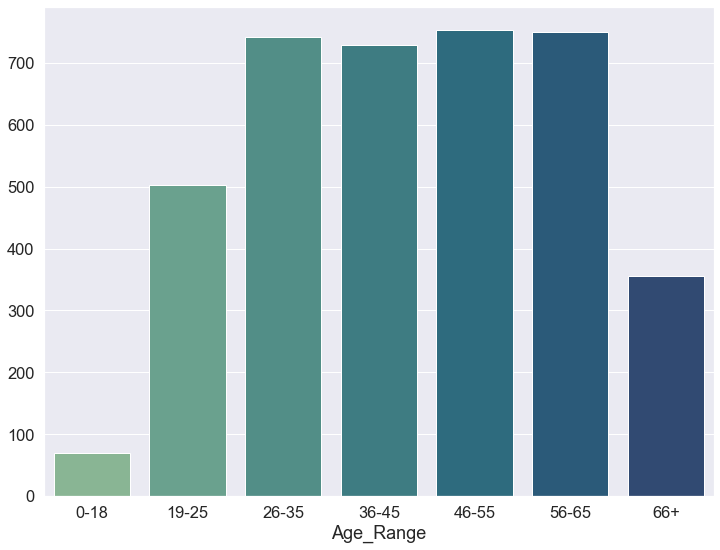

In [318]:
## Age Analysis by purchase price

bins = [0,18,25,35,45,55,65,float('inf')]
labels = ['0-18','19-25','26-35','36-45','46-55','56-65','66+']
df['Age_Range'] = pd.cut(df['Age'],bins=bins,labels=labels)

Age = df.groupby('Age_Range')['Purchase Amount (USD)'].count()
print(Age)

plt.figure(figsize=(12,9))
sns.set(font_scale=1.5)
sns.barplot(x=Age.index, y=Age.values,data=df,palette='crest')